In [1]:
import pandas as pd
import numpy as np 
import os
import matplotlib.pyplot as plt 
import seaborn as sns

In [50]:
df = pd.read_csv('consolidated_us_landfill_lat_long.csv', encoding='utf8')
df.head()

,Landfill_ID,Landfill_Name,Landfill_Alias,State,City,County,Zipcode,Latitude,Longitude,Ownership_Type,Year_opened,Landfill_Closure_Year,Status,Current_Area,Current_Depth,Design_Capacity_tons,Waste_in_Place_tons,Annual_waste_acceptance_rate_tons
0,352,Puente Hills LF,Puente Hills (PERG); San Gabriel Valley Dump,CA,Whittier,Los Angeles,90601,34.020330,-118.006040,Public,1957.0,2013.0,Closed,590.0,229.5,"142,400,000","142,250,454","2,135,318"
1,966,Fresh Kills SLF,NaN,NY,Staten Island,Richmond,10312,40.572000,-74.188000,Public,1948.0,2002.0,Closed,1416.0,NaN,"135,450,945","135,450,945","1,014,300"
2,1465,McCarty Road LF,NaN,TX,Houston,Harris,77078,29.827501,-95.243334,Private,1972.0,2031.0,Open,388.0,NaN,"123,783,905","97,983,501","1,834,618"
3,232,Olinda Alpha SLF,Olinda SLF,CA,Brea,Orange,92823,33.933610,-117.843610,Public,1960.0,2021.0,Open,420.0,235.0,"96,736,556","86,320,460","2,331,531"
4,930,Apex Regional LF,NaN,NV,Las Vegas,Clark,89165,36.374000,-114.865180,Private,1993.0,2365.0,Open,297.0,300.0,"994,920,296","72,848,073","2,804,493"


In [55]:
def convert_string_to_int(s):
    if type(s) == float:
        return s
    else: 
        return int(s.split('-')[0].replace(',' , ''))

In [59]:
def convert_str_to_num(s):
    if type(s) == float:
        return s
    else: 
        return float(s.replace(',' , ''))

In [53]:
df.dtypes

Landfill_ID                            int64
Landfill_Name                         object
Landfill_Alias                        object
State                                 object
City                                  object
County                                object
Zipcode                               object
Latitude                             float64
Longitude                            float64
Ownership_Type                        object
Year_opened                          float64
Landfill_Closure_Year                float64
Status                                object
Current_Area                         float64
Current_Depth                        float64
Design_Capacity_tons                  object
Waste_in_Place_tons                   object
Annual_waste_acceptance_rate_tons     object
dtype: object

### Converting the dataframe columns to appropriate object type before analysis

In [56]:
df['Zipcode'] = df['Zipcode'].apply(convert_string_to_int)

In [60]:
df['Design_Capacity_tons'] = df['Design_Capacity_tons'].apply(convert_str_to_num)
df['Waste_in_Place_tons'] = df['Waste_in_Place_tons'].apply(convert_str_to_num)
df['Annual_waste_acceptance_rate_tons'] = df['Annual_waste_acceptance_rate_tons'].apply(convert_str_to_num)

In [61]:
df.head()

,Landfill_ID,Landfill_Name,Landfill_Alias,State,City,County,Zipcode,Latitude,Longitude,Ownership_Type,Year_opened,Landfill_Closure_Year,Status,Current_Area,Current_Depth,Design_Capacity_tons,Waste_in_Place_tons,Annual_waste_acceptance_rate_tons
0,352,Puente Hills LF,Puente Hills (PERG); San Gabriel Valley Dump,CA,Whittier,Los Angeles,90601.0,34.020330,-118.006040,Public,1957.0,2013.0,Closed,590.0,229.5,142400000.0,142250454.0,2135318.0
1,966,Fresh Kills SLF,NaN,NY,Staten Island,Richmond,10312.0,40.572000,-74.188000,Public,1948.0,2002.0,Closed,1416.0,NaN,135450945.0,135450945.0,1014300.0
2,1465,McCarty Road LF,NaN,TX,Houston,Harris,77078.0,29.827501,-95.243334,Private,1972.0,2031.0,Open,388.0,NaN,123783905.0,97983501.0,1834618.0
3,232,Olinda Alpha SLF,Olinda SLF,CA,Brea,Orange,92823.0,33.933610,-117.843610,Public,1960.0,2021.0,Open,420.0,235.0,96736556.0,86320460.0,2331531.0
4,930,Apex Regional LF,NaN,NV,Las Vegas,Clark,89165.0,36.374000,-114.865180,Private,1993.0,2365.0,Open,297.0,300.0,994920296.0,72848073.0,2804493.0


In [62]:
df.dtypes

Landfill_ID                            int64
Landfill_Name                         object
Landfill_Alias                        object
State                                 object
City                                  object
County                                object
Zipcode                              float64
Latitude                             float64
Longitude                            float64
Ownership_Type                        object
Year_opened                          float64
Landfill_Closure_Year                float64
Status                                object
Current_Area                         float64
Current_Depth                        float64
Design_Capacity_tons                 float64
Waste_in_Place_tons                  float64
Annual_waste_acceptance_rate_tons    float64
dtype: object

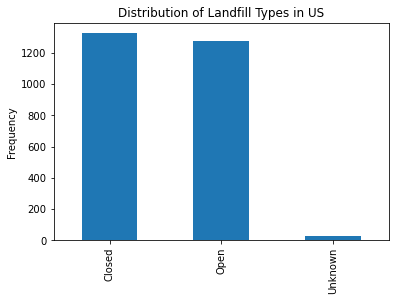

In [63]:
df['Status'].value_counts().plot(kind='bar')
plt.title("Distribution of Landfill Types in US")
plt.ylabel("Frequency")
pass

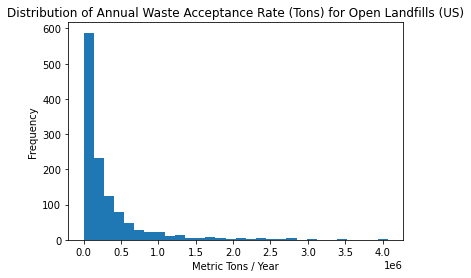

In [68]:
df[df['Status'] == 'Open']['Annual_waste_acceptance_rate_tons'].plot(kind='hist', bins=30)
plt.title('Distribution of Annual Waste Acceptance Rate (Tons) for Open Landfills (US)')
plt.xlabel('Metric Tons / Year')
pass

In [75]:
len(df[df['Annual_waste_acceptance_rate_tons'] > 600000])

195

In [76]:
df_filtered = df[df['Annual_waste_acceptance_rate_tons'] > 600000]

In [77]:
df_filtered.to_csv('Large_open_US_landfills.csv', index=False)